# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
!ls

Dataset ONE - Beer cans.ipynb craftcans.csv


In [218]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
df = pd.read_csv("craftcans.csv",
                na_values=["Does not apply"])

## Read in the file `craftcans.csv`, and look at the first first rows

In [219]:
df = pd.read_csv("craftcans.csv")
df.tail(60)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2356,Widow Maker Black Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,Does not apply
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,Does not apply
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,Does not apply
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,Does not apply
2360,Whale's Tale Pale Ale,Cisco Brewers,"Nantucket, MA",English Pale Ale,12 oz.,5.60%,Does not apply
2361,Sunlight Cream Ale,Sun King Brewing Company,"Indianapolis, IN",Cream Ale,16 oz.,5.30%,20
2362,Osiris Pale Ale (2010),Sun King Brewing Company,"Indianapolis, IN",American Pale Ale (APA),16 oz.,5.60%,50
2363,Schlafly Summer Lager,Schlafly Brewing Company,"Saint Louis, MO",Munich Helles Lager,12 oz.,4.50%,17
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.90%,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.80%,Does not apply


## How many rows do you have in the data? What are the column types?

In [220]:
df.shape

(2416, 7)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [222]:
df.Brewery.value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [223]:
df.ABV.value_counts().head()

ABV
5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [224]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [225]:
df['ABV'] = df['ABV'].str.replace("%", "").astype(float)
print(df['ABV'])

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [226]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [227]:
df.ABV.mean() 

5.977342419080068

<Axes: title={'center': 'Average ABV'}>

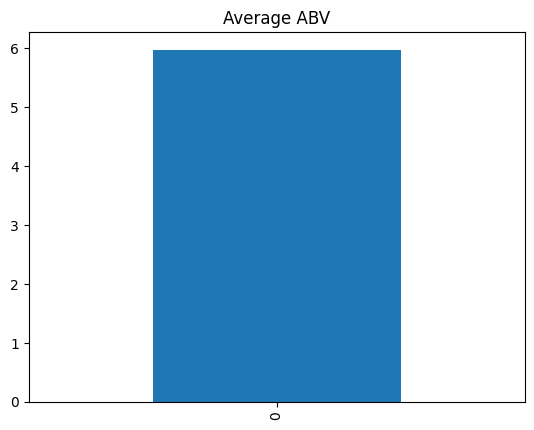

In [228]:
#df.ABV.hist()
abv = df.ABV.mean()
abv_df = pd.DataFrame({'Average ABV': [abv]})
abv_df.plot(kind='bar', legend=False, title='Average ABV')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [229]:
df.ABV.isnull().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [230]:
df.Location.value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [231]:
brooklyn_beers = df[df['Location'] == 'Brooklyn, NY']['Beer'].unique()
print(brooklyn_beers)

['4Beans' 'Jammer' 'Abigale' 'Nomader Weiss' 'Rad' 'Molotov Lite'
 'Bengali' 'Sensi Harvest' 'Hi-Res' 'KelSo Nut Brown Lager'
 'Global Warmer' 'Autumnation (2013)' 'KelSo India Pale Ale' 'The Crisp'
 'Sweet Action' 'Righteous Ale' 'Bengali Tiger' 'KelSo Pilsner'
 'Hipster Ale (Two Roads Brewing)' 'Bikini Beer' 'East India Pale Ale'
 '3Beans' 'Brownstone' 'Brooklyn Summer Ale'
 'Hipster Ale (Westbrook Brewing)' 'Apollo' 'Harbinger' 'Resin' 'Diesel'
 'Autumnation (2011-12) (2011)' 'The Crisp (2011)' 'Sweet Action (2011)'
 'Righteous Ale (2011)' 'Bengali Tiger (2011)'
 'Brooklyn Summer Ale (2011)' 'Brooklyn Lager (16 oz.)'
 'Brooklyn Lager (12 oz.)']


## What brewery in Brooklyn puts out the most different cans of beer?

In [232]:
brooklyn_breweries = df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts()
print(brooklyn_breweries)

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64


## What are the five most common styles of beer produced by Sixpoint?

In [233]:
sixpoint_beers = df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].head()
print(sixpoint_beers)

115             Baltic Porter
210                      Gose
246          Belgian Pale Ale
421    Fruit / Vegetable Beer
588              American IPA
Name: Style, dtype: object


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [234]:
df[df.Location.str.contains(", NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [235]:
NewYork_breweries = df[df.Location.str.contains(", NY", na=False)]
NewYork_breweries.Brewery.nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [236]:
df[df.Style.str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [237]:
df.IBUs = pd.to_numeric(df['IBUs'], errors='coerce')
df.IBUs.mean()

42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [238]:
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<Axes: >

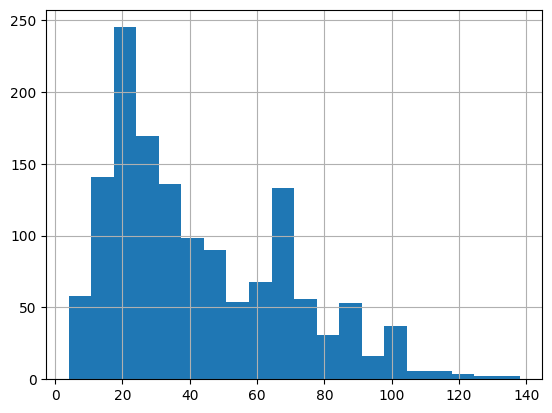

In [239]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [240]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [241]:
high_IBU = df[df['IBUs'] > 64.0]
print(high_IBU)

                         Beer                    Brewery           Location  \
6              Citra Ass Down  Against the Grain Brewery     Louisville, KY   
7              London Balling  Against the Grain Brewery     Louisville, KY   
14                Rico Sauvin  Against the Grain Brewery     Louisville, KY   
17               Pile of Face  Against the Grain Brewery     Louisville, KY   
21                 Excess IPL   Jack's Abby Craft Lagers     Framingham, MA   
...                       ...                        ...                ...   
2408    Brew Free! or Die IPA     21st Amendment Brewery  San Francisco, CA   
2410  Ten Fidy Imperial Stout        Oskar Blues Brewery       Longmont, CO   
2412       GUBNA Imperial IPA        Oskar Blues Brewery       Longmont, CO   
2414        Gordon Ale (2009)        Oskar Blues Brewery       Longmont, CO   
2415          Dale's Pale Ale        Oskar Blues Brewery       Longmont, CO   

                               Style    Size   ABV 

## List all of the beers with IBUs below the 25th percentile

In [242]:
low_IBU = df[df['IBUs'] < 21.0]
print(low_IBU)

                               Beer                        Brewery  \
2                        Wall's End              NorthGate Brewing   
12                         Sho'nuff      Against the Grain Brewery   
13                      Bloody Show      Against the Grain Brewery   
18                   The Brown Note      Against the Grain Brewery   
19                      House Lager       Jack's Abby Craft Lagers   
...                             ...                            ...   
2372               Bombshell Blonde  Southern Star Brewing Company   
2385            Bikini Blonde Lager           Maui Brewing Company   
2396               Royal Weisse Ale        Sly Fox Brewing Company   
2404                           Hell          Surly Brewing Company   
2409  Hell or High Watermelon Wheat         21st Amendment Brewery   

                 Location                       Style    Size  ABV  IBUs  
2         Minneapolis, MN           English Brown Ale  16 oz.  4.8  19.0  
12       

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [243]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=False)
#df.groupby('Style')['IBUs'].median().sort_values(na_position='last', ascending=False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [244]:
high_IBU = df[df['IBUs'] > 64]['Style']
common_high_IBU_styles = high_IBU.value_counts().head()
print(common_high_IBU_styles)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64


In [245]:
low_IBU = df[df['IBUs'] < 21]['Style']
common_low_IBU_styles = low_IBU.value_counts().head()
print(common_low_IBU_styles)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [246]:
wheat_beers = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
wheat_df = df[df['Style'].isin(wheat_beers)]
avg_ibu_wheat = wheat_df.groupby('Style')['IBUs'].mean()
print(avg_ibu_wheat)

Style
American Pale Wheat Ale    20.688525
Hefeweizen                 17.592593
Witbier                    16.208333
Name: IBUs, dtype: float64


## Draw a histogram of the IBUs of those beers

Style
American Pale Wheat Ale    Axes(0.125,0.11;0.775x0.77)
Hefeweizen                 Axes(0.125,0.11;0.775x0.77)
Witbier                    Axes(0.125,0.11;0.775x0.77)
Name: IBUs, dtype: object

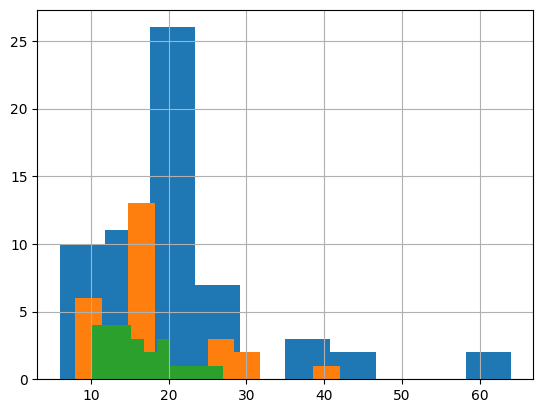

In [249]:
wheat_df.groupby('Style')['IBUs'].hist()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [253]:
IPA_df = df[df.Style.str.contains("IPA", na=False)]
IPA_df['IBUs'].mean()

71.94897959183673

<Axes: >

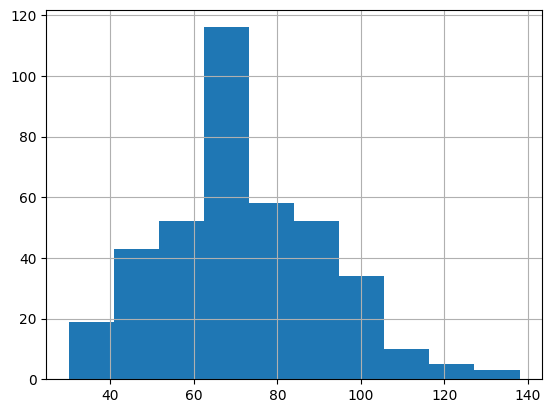

In [255]:
IPA_df['IBUs'].hist()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

Style
American Pale Wheat Ale    Axes(0.125,0.11;0.775x0.77)
Hefeweizen                 Axes(0.125,0.11;0.775x0.77)
Witbier                    Axes(0.125,0.11;0.775x0.77)
Name: IBUs, dtype: object

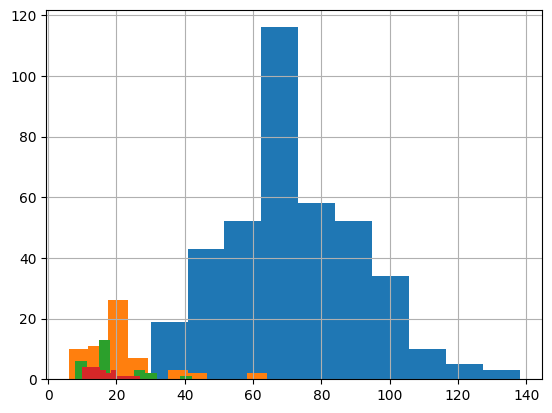

In [259]:
IPA_df['IBUs'].hist()
wheat_df.groupby('Style')['IBUs'].hist()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [264]:
wheat_beers = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
wheat_df = df[df['Style'].isin(wheat_beers)]
avg_ABV_wheat = wheat_df.groupby('Style')['ABV'].mean()
print(avg_ABV_wheat)

Style
American Pale Wheat Ale    4.841053
Hefeweizen                 5.146154
Witbier                    5.355102
Name: ABV, dtype: float64


In [266]:
IPA_df = df[df.Style.str.contains("IPA", na=False)]
avg_ABV_IPA = IPA_df.groupby('Style')['ABV'].mean()
print(avg_ABV_IPA)

Style
American Double / Imperial IPA    8.736893
American IPA                      6.452758
American White IPA                5.963636
Belgian IPA                       7.135294
English India Pale Ale (IPA)      6.233333
Name: ABV, dtype: float64


In [273]:
#comparing the two by getting the average of all IPA's and all wheats and doing a deduction
avg_ABV_IPA.mean() - avg_ABV_wheat.mean()

1.7902801229366743

## Good work!

In [272]:
#Thanks!